Notebook to check that data wrangling in lorenz.py was done properly.


### imports


In [7]:
# ipython extension to autoreload imported modules so that any changes will be 
# up to date before running code in this nb
%load_ext autoreload 
%autoreload 2

# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Lorenz96_plotter import plot_Lorenz96
from lorenz import run_Lorenz96_2coupled, lorenzDataset, lorenzToDF, DEFAULT_TIME_RESOLUTION

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### check lorenz dataframe generator and manipulation


In [3]:
df = lorenzToDF(n_days=1)
print(df.shape)
df

starting integration
(100, 72)


,X1_0,X1_1,X1_2,X1_3,X1_4,X1_5,X1_6,X1_7,X1_8,X1_9,...,X2_26,X2_27,X2_28,X2_29,X2_30,X2_31,X2_32,X2_33,X2_34,X2_35
day,,,,,,,,,,,,,,,,,,,,,
0.00,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0.01,7.990293,7.992917,7.990142,7.990073,7.990147,7.990148,7.990146,7.990146,7.990146,7.990146,...,0.980920,0.980919,0.980919,0.980925,0.980922,0.980894,0.980911,0.981026,0.980937,0.980589
0.02,7.981729,7.991540,7.980503,7.979988,7.980575,7.980595,7.980572,7.980571,7.980572,7.980572,...,0.963577,0.963523,0.963516,0.963683,0.963686,0.963249,0.963314,0.964223,0.963874,0.962492
0.03,7.975095,7.995665,7.970913,7.969311,7.971280,7.971374,7.971257,7.971252,7.971258,7.971258,...,0.948033,0.947574,0.947191,0.948169,0.948794,0.947045,0.946358,0.948867,0.949040,0.946402
0.04,7.971115,8.005070,7.961116,7.957634,7.962282,7.962551,7.962180,7.962163,7.962186,7.962187,...,0.934899,0.933800,0.930981,0.932774,0.936542,0.933999,0.930168,0.933196,0.935699,0.932702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.95,5.714782,-5.602305,-5.088387,-1.669491,-1.003640,-1.693106,6.378009,-1.086653,-10.653558,-9.867444,...,0.196580,-0.198023,-0.108872,0.035285,0.436473,0.077304,-0.042388,-0.248681,-0.066213,0.785952
0.96,4.917550,-6.112379,-4.544600,-1.805654,-0.967242,-1.676571,6.400613,-1.552714,-10.245884,-10.331851,...,0.100217,-0.171967,-0.075811,0.091629,0.417482,0.001963,-0.047060,-0.160094,-0.027549,0.616367
0.97,4.075435,-6.495986,-4.017900,-1.935227,-0.925692,-1.658296,6.431171,-1.987289,-9.761331,-10.704381,...,0.032733,-0.139789,-0.080846,0.177046,0.380567,-0.058122,-0.028213,-0.121323,0.051325,0.468341


In [4]:
df.to_numpy()

array([[8.        , 8.        , 8.        , ..., 1.        , 1.        ,
        1.        ],
       [7.9902934 , 7.99291748, 7.990142  , ..., 0.9810261 , 0.98093732,
        0.98058919],
       [7.98172884, 7.99153972, 7.98050267, ..., 0.9642227 , 0.96387367,
        0.96249242],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

#### df manipulation for X2_single

In [ ]:
k=36
X2 = df.iloc[k:]
input = X2.T.to_numpy()
input

#### df manipulation for X1X2_window

In [3]:
x_guide = [[0, 200], [321, 521], [642, 842]]
idx = np.concatenate([np.arange(x_g[0], x_g[1]) for x_g in x_guide])
# print(len(idx))
# print(idx)
# print(np.r_[[np.arange(x_g[0], x_g[1]) for x_g in x_guide]])
df.iloc[idx]
df.iloc[x_guide[0][0]:x_guide[0][1]]

,X1_0,X1_1,X1_2,X1_3,X1_4,X1_5,X1_6,X1_7,X1_8,X1_9,...,X2_26,X2_27,X2_28,X2_29,X2_30,X2_31,X2_32,X2_33,X2_34,X2_35
day,,,,,,,,,,,,,,,,,,,,,
0.00,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0.01,7.990293,7.992917,7.990142,7.990073,7.990147,7.990148,7.990146,7.990146,7.990146,7.990146,...,0.980920,0.980919,0.980919,0.980925,0.980922,0.980894,0.980911,0.981026,0.980937,0.980589
0.02,7.981729,7.991540,7.980503,7.979988,7.980575,7.980595,7.980572,7.980571,7.980572,7.980572,...,0.963577,0.963523,0.963516,0.963683,0.963686,0.963249,0.963314,0.964223,0.963874,0.962492
0.03,7.975095,7.995665,7.970913,7.969311,7.971280,7.971374,7.971257,7.971252,7.971258,7.971258,...,0.948033,0.947574,0.947191,0.948169,0.948794,0.947045,0.946358,0.948867,0.949040,0.946402
0.04,7.971115,8.005070,7.961116,7.957634,7.962282,7.962551,7.962180,7.962163,7.962186,7.962187,...,0.934899,0.933800,0.930981,0.932774,0.936542,0.933999,0.930168,0.933196,0.935699,0.932702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.95,3.559482,3.130660,4.963494,5.936454,3.747807,-1.511304,-2.249382,-1.156806,3.523272,4.501333,...,0.111320,-0.332817,-0.084052,0.008728,0.108218,-0.191374,-0.427122,0.199333,-0.295943,0.056883
1.96,3.712033,3.109544,5.059557,5.977630,3.397949,-1.704533,-2.074019,-1.173506,3.489005,4.728377,...,0.049624,-0.327504,-0.137023,-0.004048,0.101527,-0.060953,-0.394505,0.273391,-0.261968,-0.006274
1.97,3.876752,3.087846,5.149984,6.001560,3.032989,-1.862715,-1.897888,-1.183975,3.454500,4.958854,...,-0.017179,-0.323764,-0.171527,-0.039442,0.144574,0.060706,-0.336087,0.307069,-0.218607,-0.018021


### check dataset object

#### X1X2_window dataset

In [4]:
dataset = lorenzDataset(predict_from="X1X2_window",
                        n_samples=10,
                        input_steps=2/0.01, # 2 days
                        output_steps=1,
                        output_delay=1/0.01, # 1 day
                        min_buffer=20,
                        rand_buffer=False,
                        K=36,
                        F=8,
                        c=10,
                        b=10,
                        h=1,
                        coupled=True,
                        time_resolution=0.01,
                        seed=42)


In [5]:
# check the adjacency matrix
dataset.a.todense()

matrix([[1., 1., 0., ..., 0., 0., 1.],
        [1., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 1., 0.],
        [0., 0., 0., ..., 1., 1., 1.],
        [1., 0., 0., ..., 0., 1., 1.]])

In [6]:
print(dataset[1])
print(dataset[1].x.shape)
print(dataset[1].y.shape)
# print(dataset[1].t_X.shape)
# print(dataset[1].t_Y.shape)

Graph(n_nodes=36, n_node_features=400, n_edge_features=None, n_labels=1)
(36, 400)
(36, 1)


In [10]:
# test normalization
X1_manual_means = []
X1_manual_stds = []
X2_manual_means = []
X2_manual_stds = []

for g in dataset[:10]:
    x_df = pd.DataFrame(g.x)
    # print(x_df.shape)
    # print(x_df.iloc[:, :200].shape)
    y_df = pd.DataFrame(g.y)
    # print('x_df.mean(axis=1) (by node)')
    # print(x_df.mean(axis=1))
    # print('x_df.iloc[:, :200].mean(axis=1) (by node)')
    # print(x_df.iloc[:, :200].mean(axis=1))

    # print('x_df.mean()')
    # print(x_df.mean())
    # print('x_df.iloc[, :200].mean() (by timestep)')
    # print(x_df.iloc[: , :200].mean())
    # print('y_df.mean()')
    # print(y_df.mean())
    # print('x_df.std()')
    # print(x_df.std())
    # print('y_df.std()')
    # print(y_df.std())

    print('mean of timestep means should equal X1_mean_of_node_means')
    print('mean of timestep means')
    X1_df = pd.concat([x_df.iloc[:, :200], y_df], axis=1)
    X2_df = x_df.iloc[:, 200:]
    # print(X1_df)
    X1_mean_of_timestep_means = X1_df.mean(axis=0).mean()
    print(X1_mean_of_timestep_means)
    print('X1_mean_of_node_means')
    X1_mean_of_node_means = X1_df.mean(axis=1).mean()
    print(X1_mean_of_node_means)

    X1_manual_means += X1_df.mean().to_list()
    X2_manual_means += X2_df.mean().to_list()
    X1_manual_stds += X1_df.std().to_list()
    X2_manual_stds += X2_df.std().to_list()

print('X1_manual_mean')
print(np.mean(X1_manual_means))
print('X1_manual_std')
print(X1_manual_stds)
print(np.square(X1_manual_stds))
print(np.sum(np.square(X1_manual_stds))/len(X1_manual_stds))
print(np.sqrt(
    np.sum(
        np.square(X1_manual_stds)/len(X1_manual_stds)
        )
    ))
print('X2_manual_mean')
print(np.mean(X2_manual_means))
print('X2_manual_std')
print(np.sqrt(np.sum(np.square(X2_manual_stds))))
print('or?')
print(np.sqrt(np.sum(np.square(X2_manual_stds)/len(X2_manual_stds)
        )))

print('auto calculated means and stds')
print(dataset[:10].get_mean_std())

# TODO: not sure why the stdevs are not matching (though they're very close?)

mean of timestep means should equal X1_mean_of_node_means
mean of timestep means
4.00913576457644
X1_mean_of_node_means
4.009135764576441
mean of timestep means should equal X1_mean_of_node_means
mean of timestep means
2.219926921486238
X1_mean_of_node_means
2.219926921486237
mean of timestep means should equal X1_mean_of_node_means
mean of timestep means
2.012805414401924
X1_mean_of_node_means
2.0128054144019236
mean of timestep means should equal X1_mean_of_node_means
mean of timestep means
2.324608683001614
X1_mean_of_node_means
2.3246086830016144
mean of timestep means should equal X1_mean_of_node_means
mean of timestep means
2.078529275667556
X1_mean_of_node_means
2.078529275667556
mean of timestep means should equal X1_mean_of_node_means
mean of timestep means
1.8900557117367982
X1_mean_of_node_means
1.890055711736797
mean of timestep means should equal X1_mean_of_node_means
mean of timestep means
2.5635283184656603
X1_mean_of_node_means
2.563528318465661
mean of timestep means s

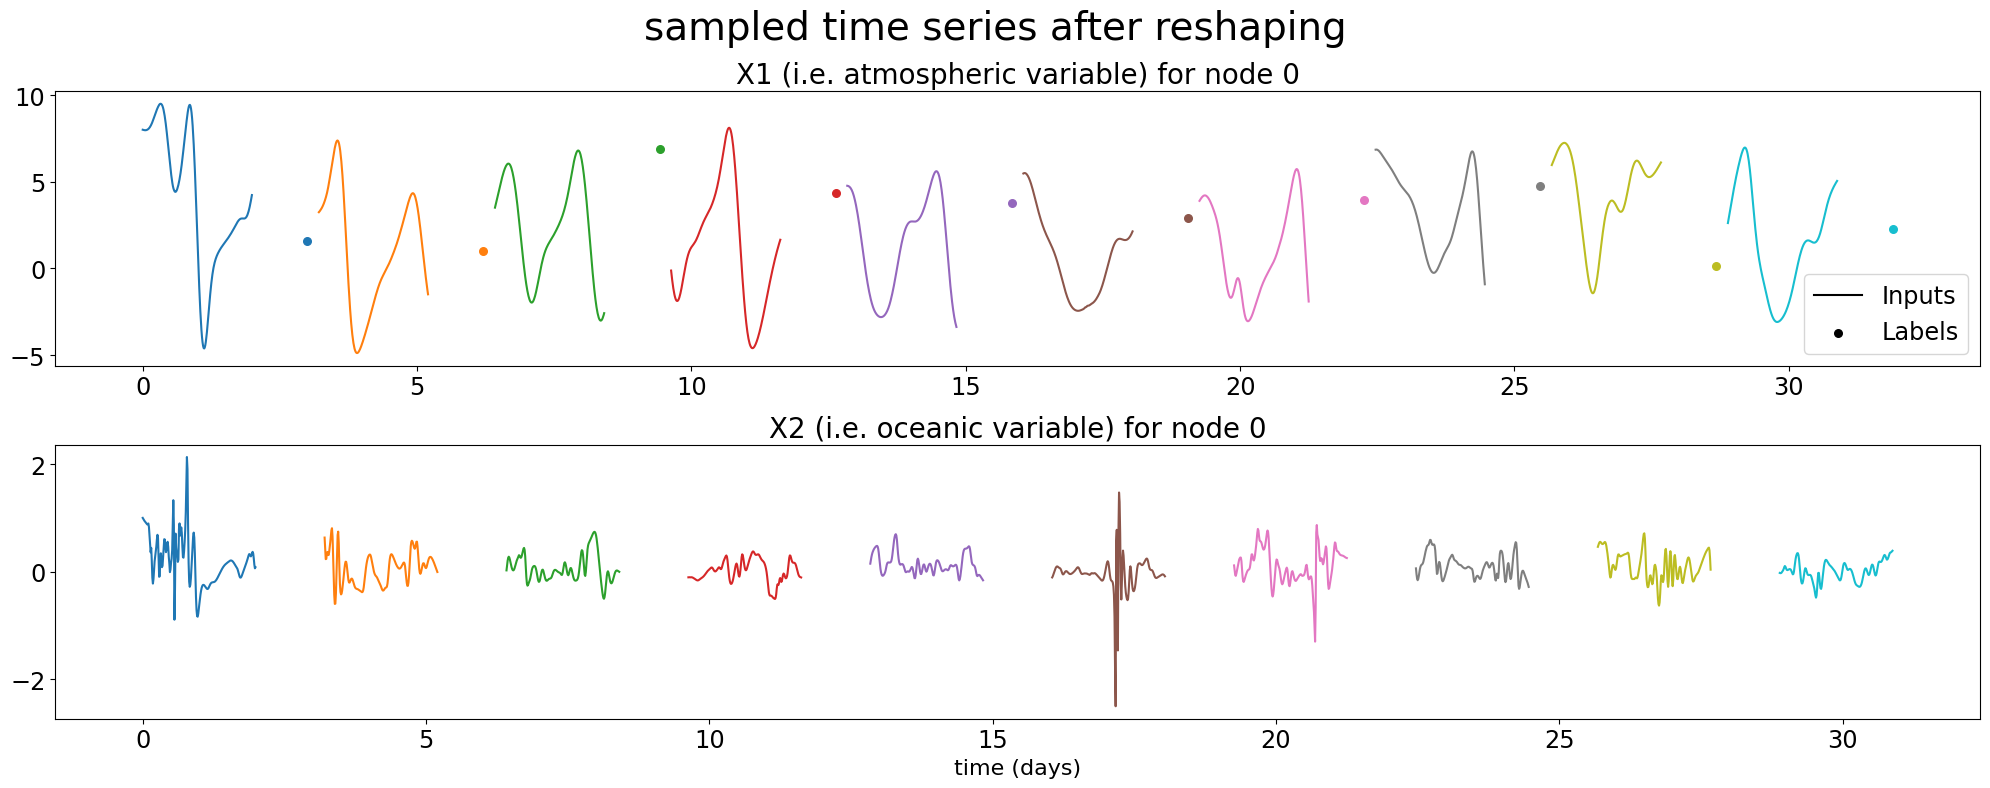

In [8]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(20, 8))
node = 0
for g in dataset:
    ax0.plot(g.t_X, g.x[node][:dataset.input_steps], label='Inputs')
    ax1.plot(g.t_X, g.x[node][dataset.input_steps:], label='Inputs')
    ax0.scatter(g.t_Y, g.y[node][:dataset.output_steps],
                label='Labels', s=30)


fig.suptitle("sampled time series after reshaping", size=28)
ax0.set_title("X1 (i.e. atmospheric variable) for node {}".format(node), size=20)
ax1.set_title("X2 (i.e. oceanic variable) for node {}".format(node), size=20)
plt.xlabel('time (days)', size=16)

# create legend
ax0.legend()
ax0.legend(handles = ax0.get_legend().legendHandles[0:2], loc='lower right') # we only want 1 line and 1 circle, we don't want a bunch of repeated elements in the legend for differet-colored lines
leg = ax0.get_legend()
[lgd.set_color('black') for lgd in leg.legendHandles]

plt.tight_layout()
plt.show()

let's compare the samples against the original Lorenz data


First component
Second Component


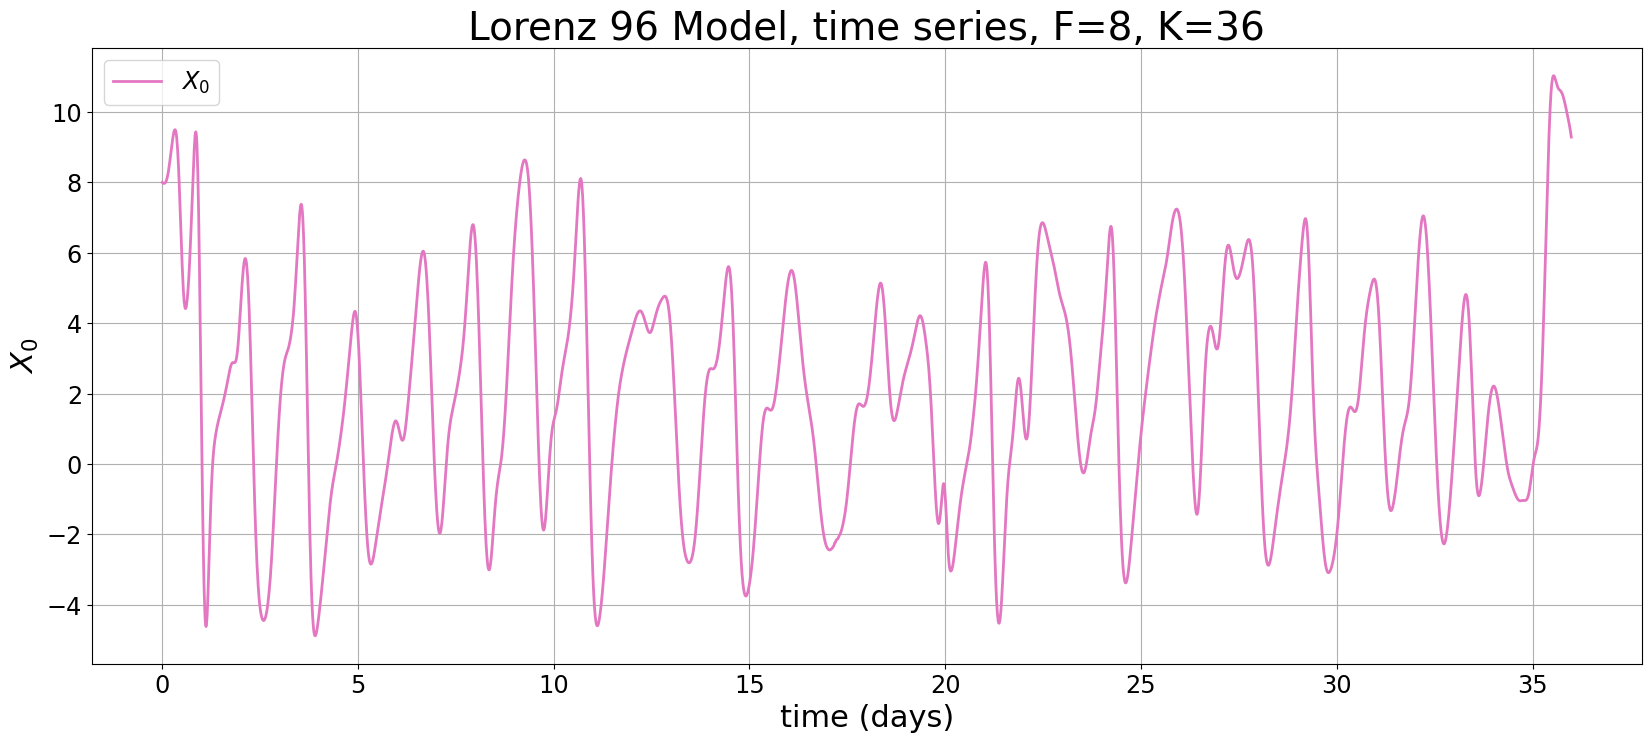

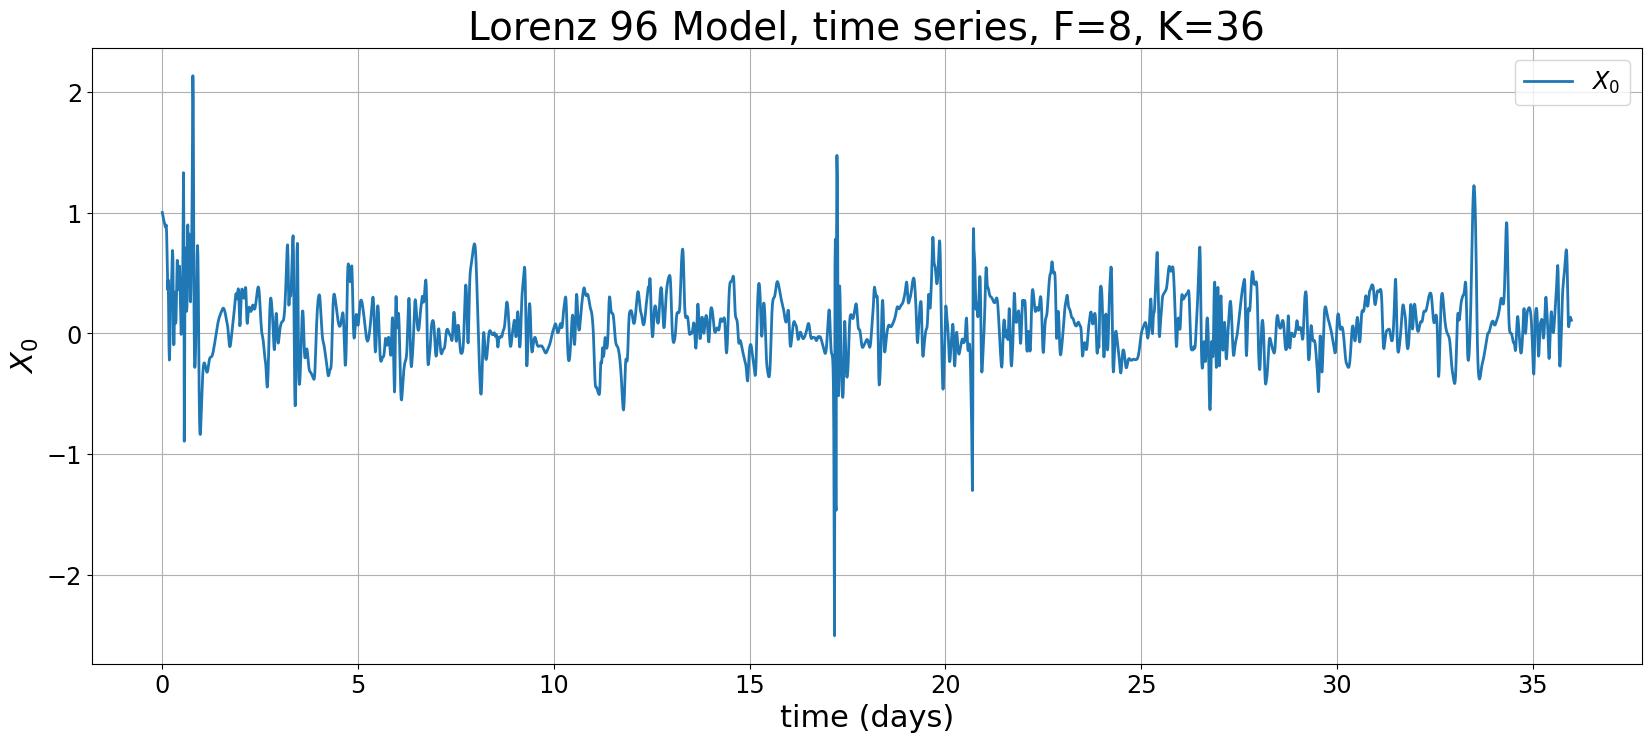

In [9]:
t, X_raw, _, _, _ = run_Lorenz96_2coupled(K=36,
                                          F=8,
                                          c=10,
                                          b=10,
                                          h=1,
                                          number_of_days=36,
                                          seed=42)
plot_Lorenz96(True, False, X_raw, t, F=8, K=36, number_of_days=36)

great! they match.

questions:

- what if we want to train at multiple time scales?


#### X2_single dataset

In [13]:
dataset = lorenzDataset(predict_from="X2",
                        n_samples=10,
                        # input_steps=2/0.01, # 2 days
                        # output_steps=1,
                        # output_delay=1/0.01, # 1 day
                        # min_buffer=20,
                        # rand_buffer=False,
                        K=36,
                        F=8,
                        c=10,
                        b=10,
                        h=1,
                        coupled=True,
                        time_resolution=DEFAULT_TIME_RESOLUTION,
                        seed=42)



generating new Lorenz data and saving to file
generating paired data
starting integration
reading Lorenz data from stored file


In [9]:
# check the adjacency matrix
dataset.a.todense()

matrix([[1., 1., 0., ..., 0., 0., 1.],
        [1., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 1., 0.],
        [0., 0., 0., ..., 1., 1., 1.],
        [1., 0., 0., ..., 0., 1., 1.]])

In [12]:
print(dataset[1])
print(dataset[1].x.shape)
print(dataset[1].y.shape)

Graph(n_nodes=36, n_node_features=1, n_edge_features=None, n_labels=1)
(36, 1)
(36, 1)


In [ ]:
# test normalization
X1_manual_means = []
X1_manual_stds = []
X2_manual_means = []
X2_manual_stds = []

for g in dataset:
    x_df = pd.DataFrame(g.x)
    # print(x_df.shape)
    # print(x_df.iloc[:, :200].shape)
    y_df = pd.DataFrame(g.y)
    # print('x_df.mean(axis=1) (by node)')
    # print(x_df.mean(axis=1))
    # print('x_df.iloc[:, :200].mean(axis=1) (by node)')
    # print(x_df.iloc[:, :200].mean(axis=1))

    # print('x_df.mean()')
    # print(x_df.mean())
    # print('x_df.iloc[, :200].mean() (by timestep)')
    # print(x_df.iloc[: , :200].mean())
    # print('y_df.mean()')
    # print(y_df.mean())
    # print('x_df.std()')
    # print(x_df.std())
    # print('y_df.std()')
    # print(y_df.std())

    print('mean of timestep means should equal X1_mean_of_node_means')
    print('mean of timestep means')
    X1_df = pd.concat([x_df.iloc[:, :200], y_df], axis=1)
    X2_df = x_df.iloc[:, 200:]
    # print(X1_df)
    X1_mean_of_timestep_means = X1_df.mean(axis=0).mean()
    print(X1_mean_of_timestep_means)
    print('X1_mean_of_node_means')
    X1_mean_of_node_means = X1_df.mean(axis=1).mean()
    print(X1_mean_of_node_means)

    X1_manual_means += X1_df.mean().to_list()
    X2_manual_means += X2_df.mean().to_list()
    X1_manual_stds += X1_df.std().to_list()
    X2_manual_stds += X2_df.std().to_list()

print('X1_manual_mean')
print(np.mean(X1_manual_means))
print('X1_manual_std')
print(X1_manual_stds)
print(np.square(X1_manual_stds))
print(np.sum(np.square(X1_manual_stds))/len(X1_manual_stds))
print(np.sqrt(
    np.sum(
        np.square(X1_manual_stds)/len(X1_manual_stds)
        )
    ))
print('X2_manual_mean')
print(np.mean(X2_manual_means))
print('X2_manual_std')
print(np.sqrt(np.sum(np.square(X2_manual_stds))))
print('or?')
print(np.sqrt(np.sum(np.square(X2_manual_stds)/len(X2_manual_stds)
        )))

print('auto calculated means and stds')
print(dataset[:10].get_mean_std())

# TODO: not sure why the stdevs are not matching (though they're very close?)